In [1]:
import numpy as np
import matplotlib.pyplot as plt
from toolkit import *




# 0. Before Start

Please download (more) samples from [OneDrive](https://1drv.ms/f/c/347c1b40c8c6e5ec/Ej5OQVE_APpOnNuP-ZXpnZcBnr_-ix5W-twQcYIJ-dvW2A?e=YcBSPF), and put them into `data` and `results` folders, respectively. 

# 1. load the data in the npz format

In [2]:
data_path = '/Users/nicholasmolina/Desktop/senior-project/GDP-HMM_Challenge/valid_nodose/0617-492081+2Ac+MOS_10706.npz'
data_npz = np.load(data_path, allow_pickle=True)

In [3]:
dose_pred_path = '/Users/nicholasmolina/Desktop/senior-project/GDP-HMM_AAPMChallenge/pretrainmodel/results_val/0617-492081+2Ac+MOS_10706_pred.npy'
dose_pred_npz = np.load(dose_pred_path, allow_pickle=True)


In [4]:
data_dict = dict(data_npz)['arr_0'].item()

In [5]:
data_dict.keys()

dict_keys(['Trachea', 'Total Lung-GTV', 'SpinalCord_05', 'SpinalCord', 'PTV_Ring.3-2', 'PTV', 'Lung_Total', 'Lung_Ipsi', 'Lung_Cntr', 'LAD', 'Heart', 'GreatVessels', 'GTV', 'Esophagus', 'CTV', 'BrachialPlexus', 'Body_Ring0-3', 'Body', '50per_Ring1.5-5', 'all_mask', 'img', 'isVMAT', 'isocenter', 'angle_list', 'origin', 'spacing', 'direction', 'size', 'angle_plate', 'beam_plate'])

Text(0.5, 1.0, 'View from Coronal plane')

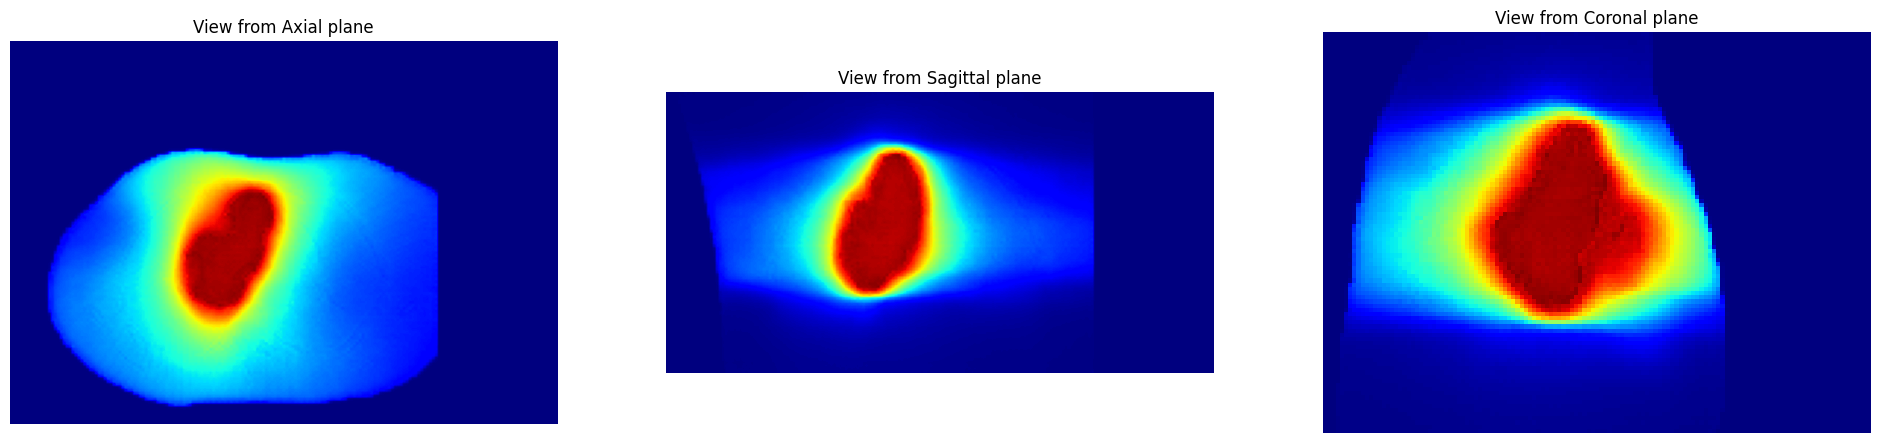

In [6]:
fig = plt.figure(figsize=(24, 8))

dose = dose_pred_npz 
#dose = np.flip(data_dict['dose'], axis=0)
#dose = np.flip(dose, axis=2)

ax1 = fig.add_subplot(131)
ax1.imshow(dose[ int(data_dict['isocenter'][0])], 'jet')
ax1.axis('off')
ax1.set_title('View from Axial plane')

ax2 = fig.add_subplot(132)
ax2.imshow(dose[::-1, int(data_dict['isocenter'][1]), :], 'jet')
ax2.axis('off')
ax2.set_title('View from Sagittal plane')

ax3 = fig.add_subplot(133)
ax3.imshow(dose[::-1, ::-1, int(data_dict['isocenter'][2])], 'jet')
ax3.axis('off')
ax3.set_title('View from Coronal plane')

### show the patient in Eclipse system 

The partcipants may not be able to show the plan in Eclipse system, here we can provide a screenshot. 

<img src="./figs/eclipse.png">

## 2. show data with matplotlib in three directions

Since the spacing is [2, 2.5, 2.5] for [z, x, y], some the image may look like a little stretched. 

[48.0, 72.0, 74.0] (96, 131, 187)


Text(0.5, 1.0, 'View from Coronal plane')

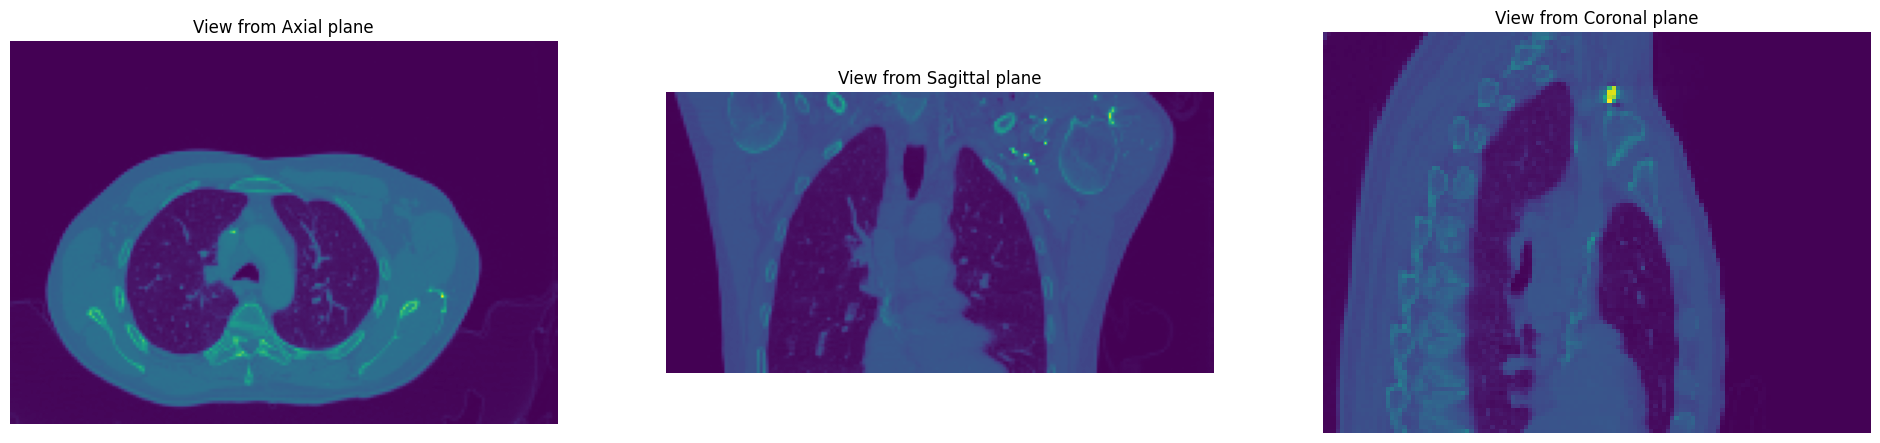

In [7]:

print (data_dict['isocenter'], data_dict['img'].shape)

fig = plt.figure(figsize=(24, 8))

ax1 = fig.add_subplot(131)
ax1.imshow(data_dict['img'][int(data_dict['isocenter'][0])])
ax1.axis('off')
ax1.set_title('View from Axial plane')

ax2 = fig.add_subplot(132)
ax2.imshow(data_dict['img'][::-1, int(data_dict['isocenter'][1]), :])
ax2.axis('off')
ax2.set_title('View from Sagittal plane')

ax3 = fig.add_subplot(133)
ax3.imshow(data_dict['img'][::-1, ::-1, int(data_dict['isocenter'][2])])
ax3.axis('off')
ax3.set_title('View from Coronal plane')


Text(0.5, 1.0, 'View from Coronal plane')

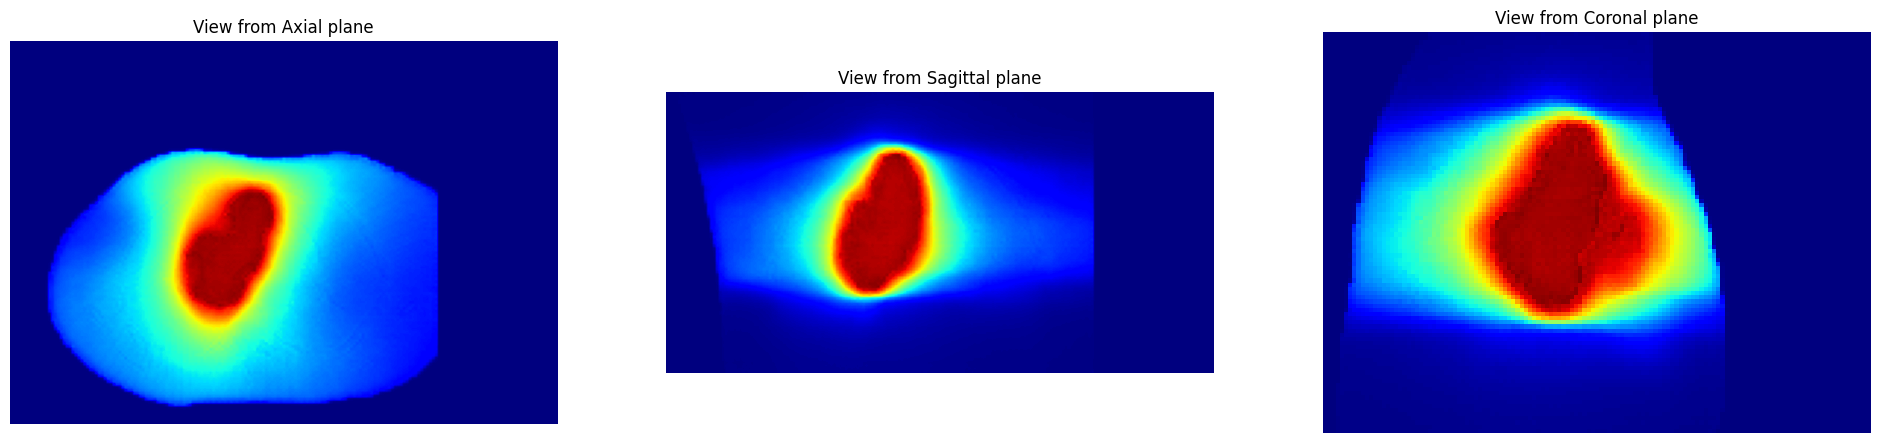

In [8]:
fig = plt.figure(figsize=(24, 8))

# dose = data_dict['dose'] 
dose = dose_pred_npz
#dose = np.flip(data_dict['dose'], axis=0)
#dose = np.flip(dose, axis=2)

ax1 = fig.add_subplot(131)
ax1.imshow(dose[ int(data_dict['isocenter'][0])], 'jet')
ax1.axis('off')
ax1.set_title('View from Axial plane')

ax2 = fig.add_subplot(132)
ax2.imshow(dose[::-1, int(data_dict['isocenter'][1]), :], 'jet')
ax2.axis('off')
ax2.set_title('View from Sagittal plane')

ax3 = fig.add_subplot(133)
ax3.imshow(dose[::-1, ::-1, int(data_dict['isocenter'][2])], 'jet')
ax3.axis('off')
ax3.set_title('View from Coronal plane')

## 3. Show the DVHs of the plan

Dose-Volume Histogram (DVH) is widely used in visualizing plan to check the quality. Please read our source code and some related resources online if you do not know about DVH. Here we provide the Python code to show DVHs with flexible needed masks. 

In [9]:
data_dict['dose'] = dose_pred_npz


In [11]:
data_dict

{'Trachea': array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ...

In [10]:
dvh_dict = NPZ2DVH(data_dict, needed_mask = ['PTV_High', 'OCavity-PTV', 'Brain'], ref_ptv_name = None, ref_dose = None, bin_size = 0.1, with_plt = True, save_plt_path = None)

KeyError: 'PTV_High'

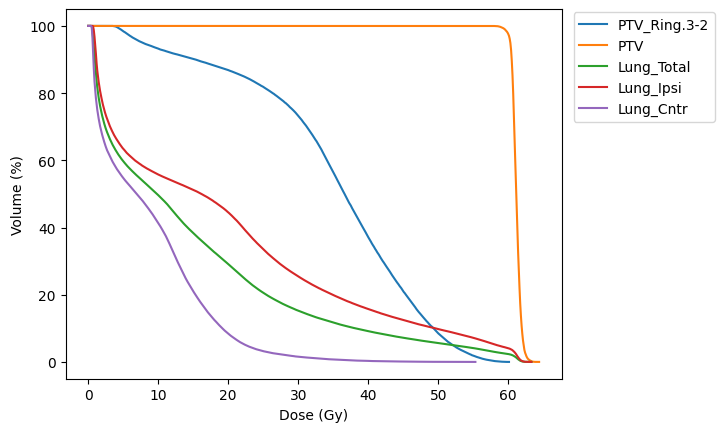

In [13]:
dvh_dict = NPZ2DVH(data_dict, needed_mask = ['PTV_Ring.3-2','PTV','Lung_Total','Lung_Ipsi','Lung_Cntr',], ref_ptv_name = None, ref_dose = None, bin_size = 0.1, with_plt = True, save_plt_path = None)

## 4. screenshot with different image data 

To check data in a large scale, it would be great visualize multiple 3D data with 2D slices selected. 

(-0.5, 934.5, 130.5, -0.5)

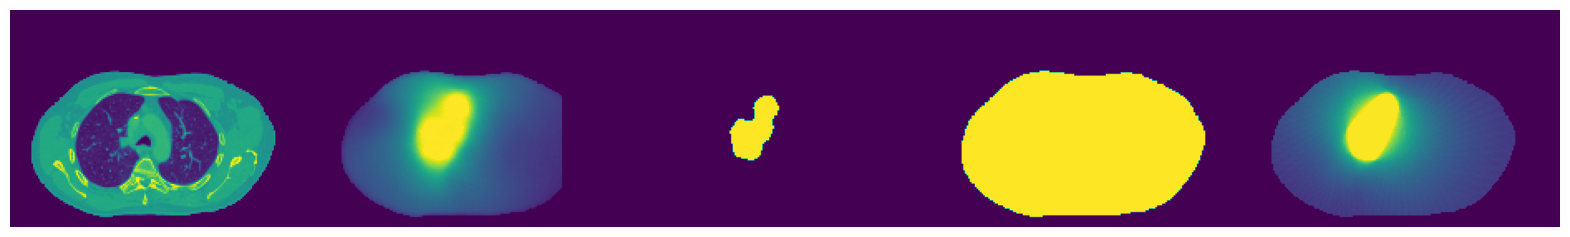

In [12]:
save_img = save_screenshot(data_dict, 'PTV', index = int(data_dict['isocenter'][0]), masked_by_body = True)
fig = plt.figure(figsize=(20, 4))
plt.imshow(save_img)
plt.axis('off')

(-0.5, 754.5, 99.5, -0.5)

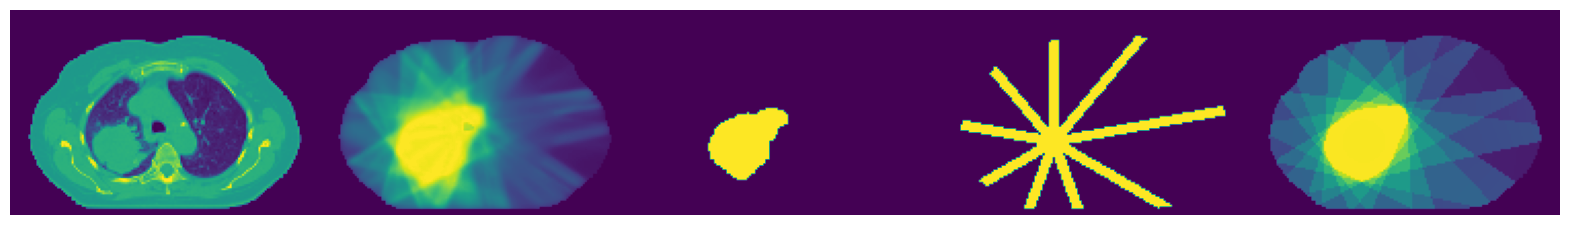

In [11]:
data_dict2 = np.load('data/0617-259694+imrt+MOS_33896.npz', allow_pickle=True)['arr_0'].item()

save_img = save_screenshot(data_dict2, 'PTV', index = int(data_dict2['isocenter'][0]), masked_by_body = True)
fig = plt.figure(figsize=(20, 4))
plt.imshow(save_img)
plt.axis('off')

In [10]:
int(data_dict['isocenter'][0])

64

## 5. Understanding meta data and json files

### 5.1 the csv file

We provide an <a href="data_loader.py" _target='blank'>data loader</a> example for the PyTorch training. The <a href="meta_data.csv" _target='blank'>meta_data.csv</a> is the master file stored the npz data path and meta file information (which could be used for conditioning the model). 

In [2]:
import pandas as pd
df = pd.read_csv('meta_files/meta_data.csv')


In [5]:
# create fake split for development purpose (optional)
all_train_patients = df[df['phase'] == 'train']['PID'].tolist()
all_train_patients = sorted(list(set(all_train_patients)))
print (len(all_train_patients))
fake_valid_split = []
for i in range(len(all_train_patients)):
    if i % 20 == 0:
        fake_valid_split.append(all_train_patients[i])

print (len(fake_valid_split))

fake_split = []
for i, item in df.iterrows():
    if item['phase'] == 'train' and item['PID'] not in fake_valid_split:
        fake_split.append('train')
    elif item['phase'] == 'train' and item['PID'] in fake_valid_split:
        fake_split.append('valid')
    else:
        assert item['phase'] == 'valid'
        fake_split.append('test')

df['dev_split'] = fake_split

df.to_csv('meta_files/meta_data.csv', index=False)


1275
64


The `isVMAT` is binary indicates if the plan is VMAT or IMRT. `site` is the site index of either head-and-neck or lung. `cohort` is cohort index. Note that, different train/validation/test splits may have different cohorts. 

### 5.2 the json file

`Pat_Obj_dict.json` documents the RT structures **actually used** during the optimization when creating the **reference dose**. Note in the npz file, more structures can be included but some of them may not be used for optimization due to too small structures or too large overlapped with PTV. 

In [7]:
import json 

Pat_Obj_dict = json.load(open('meta_files/Pat_Obj_DICT.json'))
print (Pat_Obj_dict['0522c0003']['A4Ac'])

['SpinalCord', 'Parotids-PTV', 'Chiasm', 'Brain', 'OCavity-PTV', 'RingPTVHigh', 'Esophagus', 'PTVHighOPT', 'Cochlea_R', 'Lips', 'BrainStem_03', 'RingPTVMid', 'Mandible-PTV', 'PTVLow', 'ParotidIps-PTV', 'Pituitary', 'Mandible', 'RingPTVLow', 'Cochlea_L', 'Larynx', 'Eyes', 'OpticNerve_R', 'ParotidCon-PTV', 'Thyroid-PTV', 'Posterior_Neck', 'PharConst-PTV', 'OpticNerve_L', 'BrainStem', 'Larynx-PTV', 'PTVMidOPT', 'PharynxConst', 'SpinalCord_05', 'Parotids', 'Shoulders', 'Thyroid', 'Trachea', 'PTVMid', 'PTVLowOPT', 'OralCavity', 'Lungs']


`PTV_DICT.json` documents the **prescribed dose** of different PTVs used when creating the **reference plan**. We automatically extract the prescribed dose from the clinical plan if available to best keep clinical intent. For example, we extract the prescribed dose from the PTV names first, if the number is missing or error detected, we imput the prescribed dose with dose metrics (e.g., D95, D98) or procotol suggestion. 

The **prescribed dose** is provided as input data for all train/validation/test splits, so it could be used for the input of the AI model. 

In [13]:
PTV_DICT = json.load(open('meta_files/PTV_DICT.json'))
PTV_DICT['0522c0003']

{'PTV_High': {'OPTName': 'PTVHighOPT', 'PDose': 70, 'RingName': 'RingPTVHigh'},
 'PTV_Low': {'MinusName': 'PTVLow-PTVMid',
  'OPTName': 'PTVLowOPT',
  'PDose': 54,
  'RingName': 'RingPTVLow',
  'StructName': 'PTVLow'},
 'PTV_Mid': {'MinusName': 'PTVMid-PTVHigh',
  'OPTName': 'PTVMidOPT',
  'PDose': 56,
  'RingName': 'RingPTVMid',
  'StructName': 'PTVMid'}}